durchschnittlichen Umsatz für Heimspieltage und normale Tage zeigt


Durchschnittlicher Umsatz an Heimspieltagen: 233.55 EUR
Durchschnittlicher Umsatz an normalen Tagen: 205.37 EUR
T-Test: t=3.70, p=0.0002
Der Unterschied ist signifikant (p < 0.05).


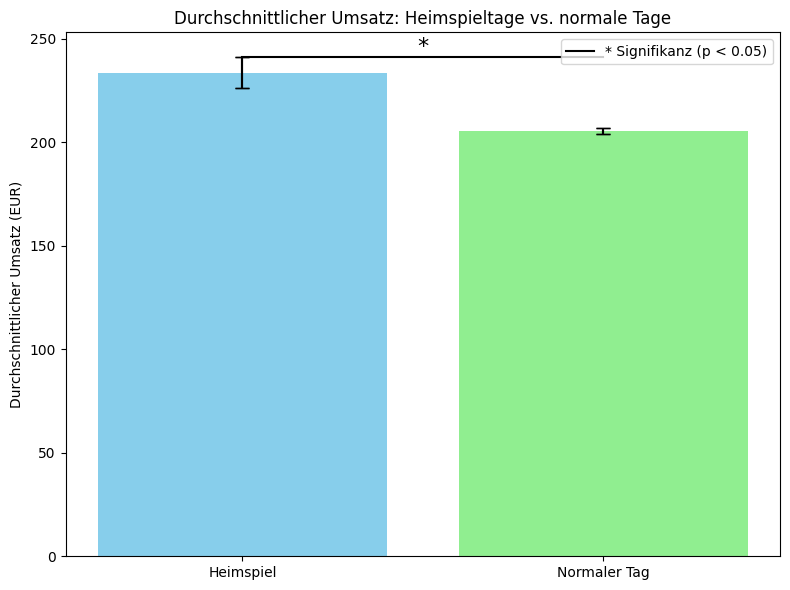

In [18]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Stellen Sie sicher, dass Diagramme in Jupyter angezeigt werden
%matplotlib inline

# CSV-Datei laden (passen Sie den Dateipfad an)
file_path = r'C:\Users\Jojo\Downloads\merged_umsatz_heimspiel.csv'
df = pd.read_csv(file_path)

# Konvertiere das Datum in datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Daten für Heimspieltage und normale Tage extrahieren
home_game_sales = df[df['Heimspiel Holstein Kiel'] == 1]['Umsatz']
normal_day_sales = df[df['Heimspiel Holstein Kiel'] == 0]['Umsatz']

# Berechnungen für Heimspieltage
mean_home_game = home_game_sales.mean()
std_home_game = home_game_sales.std()
n_home_game = home_game_sales.count()

# Berechnungen für normale Tage
mean_normal_day = normal_day_sales.mean()
std_normal_day = normal_day_sales.std()
n_normal_day = normal_day_sales.count()

# T-Test durchführen
t_stat, p_value = stats.ttest_ind(home_game_sales, normal_day_sales, equal_var=False)  # Welch's t-test

# Signifikanzniveau
alpha = 0.05
is_significant = p_value < alpha

# Ergebnisse ausgeben
print(f"Durchschnittlicher Umsatz an Heimspieltagen: {mean_home_game:.2f} EUR")
print(f"Durchschnittlicher Umsatz an normalen Tagen: {mean_normal_day:.2f} EUR")
print(f"T-Test: t={t_stat:.2f}, p={p_value:.4f}")
if is_significant:
    print(f"Der Unterschied ist signifikant (p < {alpha}).")
else:
    print(f"Der Unterschied ist nicht signifikant (p >= {alpha}).")

# Plotten
labels = ['Heimspiel', 'Normaler Tag']
means = [mean_home_game, mean_normal_day]
errors = [std_home_game / np.sqrt(n_home_game), std_normal_day / np.sqrt(n_normal_day)]

fig, ax = plt.subplots(figsize=(8, 6))

# Balkendiagramm
bars = ax.bar(labels, means, yerr=errors, capsize=5, color=['skyblue', 'lightgreen'])

# Konfidenzintervall hinzufügen
for bar, error in zip(bars, errors):
    ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=error, fmt='none', color='black', capsize=5)

# Signifikanz kennzeichnen
if is_significant:
    # Position und Markierung
    x1, x2 = 0, 1  # Indizes der Balken
    y, h, col = max(means) + max(errors), 0.1, 'black'  # Höhe und Farbe
    ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, color=col)
    ax.text((x1 + x2) * 0.5, y + h, '*', ha='center', va='bottom', color=col, fontsize=16)

# Titel und Labels hinzufügen
ax.set_title('Durchschnittlicher Umsatz: Heimspieltage vs. normale Tage')
ax.set_ylabel('Durchschnittlicher Umsatz (EUR)')

# Legende hinzufügen
if is_significant:
    ax.legend(['* Signifikanz (p < 0.05)'], loc='upper right')

# Layout anpassen und Diagramm anzeigen
plt.tight_layout()
plt.show()


Warengruppen miteinander zu vergleichen und zu überprüfen, ob eine Warengruppe an Heimspieltagen mehr verkauft wird als an normalen Tagen

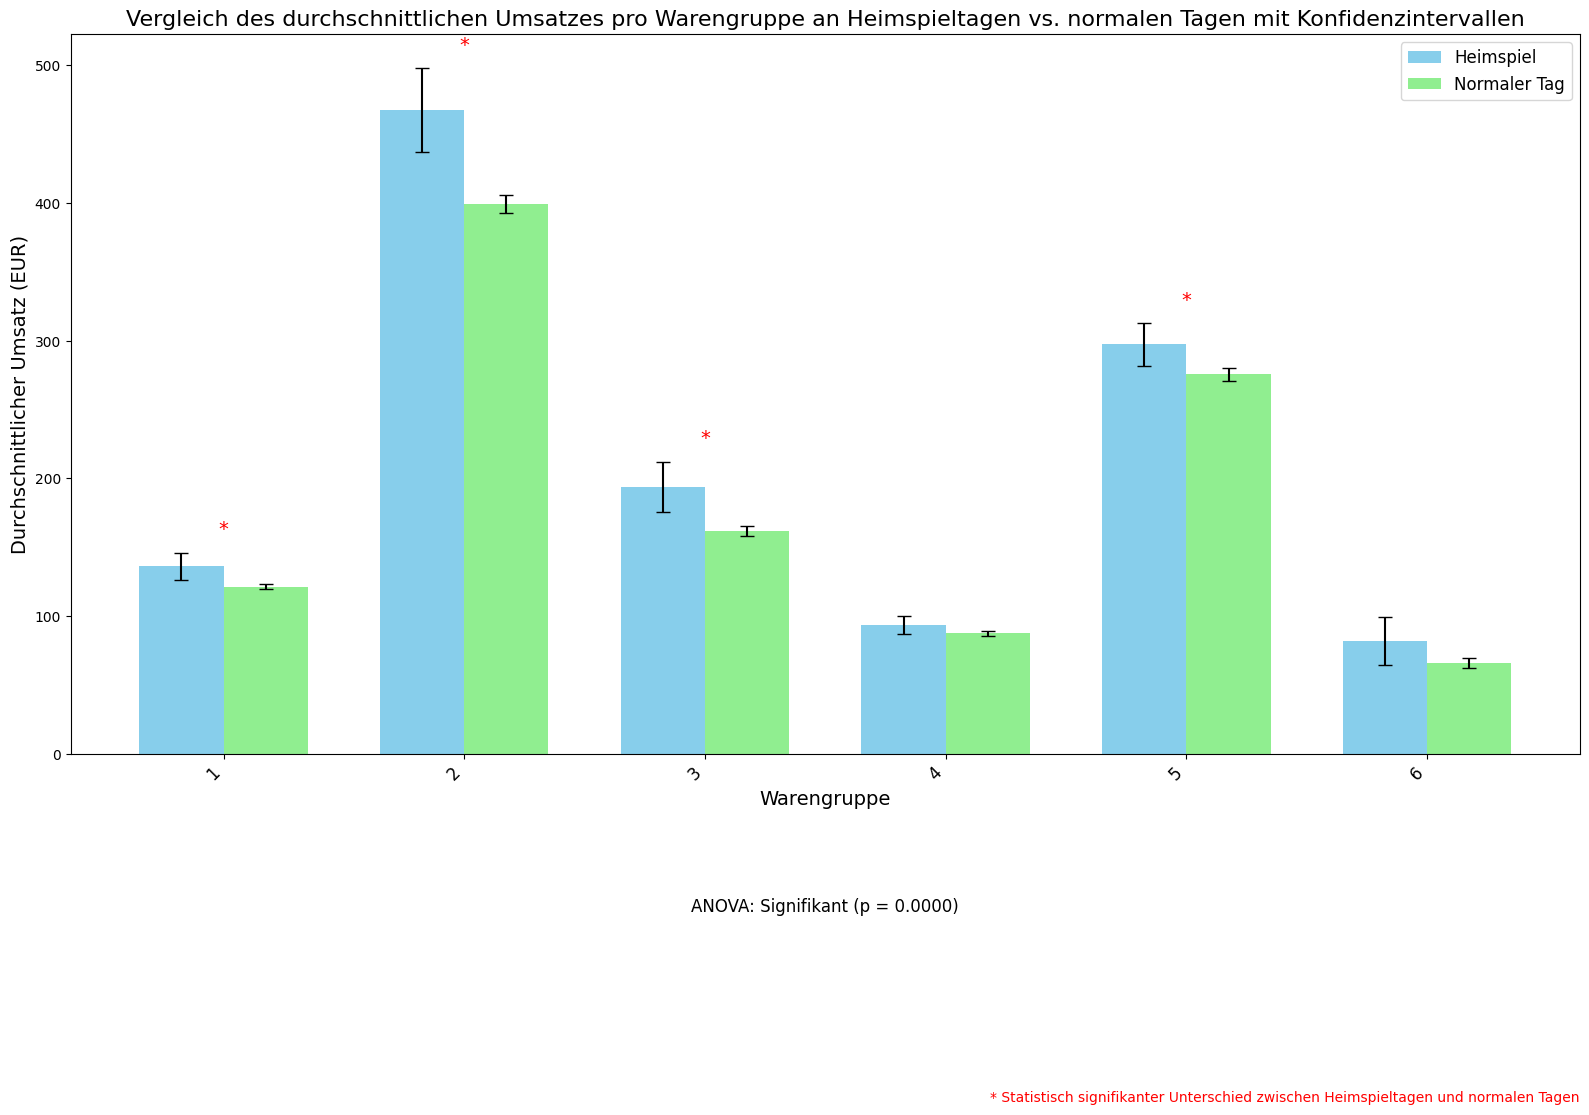

Tukey-HSD-Ergebnisse:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2  280.3554    0.0  272.2095  288.5013   True
     1      3   41.1984    0.0   33.0525   49.3443   True
     1      4  -34.1885    0.0  -42.3952  -25.9817   True
     1      5   154.653    0.0  146.5071  162.7989   True
     1      6  -55.2259    0.0  -70.7132  -39.7386   True
     2      3  -239.157    0.0 -247.3029 -231.0111   True
     2      4 -314.5439    0.0 -322.7506 -306.3371   True
     2      5 -125.7024    0.0 -133.8483 -117.5565   True
     2      6 -335.5813    0.0 -351.0686  -320.094   True
     3      4  -75.3869    0.0  -83.5936  -67.1801   True
     3      5  113.4546    0.0  105.3087  121.6005   True
     3      6  -96.4243    0.0 -111.9116   -80.937   True
     4      5  188.8415    0.0  180.6347  197.0482   True
     4      6  -21.0374 0.0016  -36.5568    -5.518

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# CSV-Datei laden
df = pd.read_csv(r'C:\Users\Jojo\Downloads\merged_umsatz_heimspiel.csv')

# Konvertiere das Datum in datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Liste der Warengruppen
warengruppen = df['Warengruppe'].unique()

# Erstellen der Balkendiagramme
fig, ax = plt.subplots(figsize=(16, 12))  # Größere Fläche für das Diagramm

# Listen für die Ergebnisse
warengruppe_labels = []
means_home_game = []
means_normal_day = []
errors_home_game = []
errors_normal_day = []
significant_differences = []

# Z-Wert für 95%-Konfidenzintervall
z_score = stats.norm.ppf(0.975)

# Daten für ANOVA vorbereiten
anova_data = []

for warengruppe in warengruppen:
    # Filtere nach der Warengruppe
    warengruppe_sales = df[df['Warengruppe'] == warengruppe]

    # Berechne den Umsatz an Heimspieltagen für diese Warengruppe
    home_game_sales = warengruppe_sales[warengruppe_sales['Heimspiel Holstein Kiel'] == 1]['Umsatz']
    mean_home_game = home_game_sales.mean()
    std_home_game = home_game_sales.std()
    n_home_game = home_game_sales.count()

    # Berechne den Standardfehler und das Konfidenzintervall für Heimspieltage
    std_error_home_game = std_home_game / np.sqrt(n_home_game)
    errors_home_game.append(z_score * std_error_home_game)

    # Berechne den Umsatz an normalen Tagen für diese Warengruppe
    normal_day_sales = warengruppe_sales[warengruppe_sales['Heimspiel Holstein Kiel'] == 0]['Umsatz']
    mean_normal_day = normal_day_sales.mean()
    std_normal_day = normal_day_sales.std()
    n_normal_day = normal_day_sales.count()

    # Berechne den Standardfehler und das Konfidenzintervall für normale Tage
    std_error_normal_day = std_normal_day / np.sqrt(n_normal_day)
    errors_normal_day.append(z_score * std_error_normal_day)

    # Speichere die Mittelwerte
    warengruppe_labels.append(warengruppe)
    means_home_game.append(mean_home_game)
    means_normal_day.append(mean_normal_day)

    # Statistischer Test: t-Test für unabhängige Stichproben
    t_stat, p_value = stats.ttest_ind(home_game_sales, normal_day_sales, equal_var=False, nan_policy='omit')
    significant_differences.append(p_value < 0.05)  # Speichere True, wenn p < 0.05 (signifikant)

    # ANOVA-Daten sammeln
    for value in home_game_sales:
        anova_data.append((value, warengruppe, 'Heimspiel'))
    for value in normal_day_sales:
        anova_data.append((value, warengruppe, 'Normaler Tag'))

# ANOVA durchführen
anova_df = pd.DataFrame(anova_data, columns=['Umsatz', 'Warengruppe', 'Heimspielstatus'])
anova_results = stats.f_oneway(
    *[anova_df[anova_df['Warengruppe'] == wg]['Umsatz'] for wg in warengruppe_labels]
)

# Tukey-Test für paarweise Vergleiche
tukey_results = pairwise_tukeyhsd(anova_df['Umsatz'], anova_df['Warengruppe'])

# Plotten der Balkendiagramme
bar_width = 0.35
index = np.arange(len(warengruppe_labels))

bar1 = ax.bar(index - bar_width / 2, means_home_game, bar_width, yerr=errors_home_game,
              capsize=5, color='skyblue', label='Heimspiel')

bar2 = ax.bar(index + bar_width / 2, means_normal_day, bar_width, yerr=errors_normal_day,
              capsize=5, color='lightgreen', label='Normaler Tag')

# Füge statistische Signifikanz in den Plot ein
for i in range(len(warengruppe_labels)):
    if significant_differences[i]:
        # Zeichne ein Sternchen über den Balken, wenn ein signifikanter Unterschied besteht
        x_pos = index[i]
        max_height = max(means_home_game[i], means_normal_day[i]) + max(errors_home_game[i], errors_normal_day[i])
        ax.text(x_pos, max_height + 10, '*', ha='center', va='bottom', fontsize=14, color='red')

# ANOVA-Ergebnisse: Signifikante Unterschiede zwischen Warengruppen
anova_significant = anova_results.pvalue < 0.05
anova_text = f"ANOVA: {'Signifikant' if anova_significant else 'Nicht signifikant'} (p = {anova_results.pvalue:.4f})"
ax.text(0.5, -0.2, anova_text, ha='center', va='top', fontsize=12, transform=ax.transAxes)

# Titel und Labels hinzufügen
ax.set_title('Vergleich des durchschnittlichen Umsatzes pro Warengruppe an Heimspieltagen vs. normalen Tagen mit Konfidenzintervallen', fontsize=16)
ax.set_xlabel('Warengruppe', fontsize=14)
ax.set_ylabel('Durchschnittlicher Umsatz (EUR)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(warengruppe_labels, rotation=45, ha='right', fontsize=12)

# Legende hinzufügen
ax.legend(fontsize=12)

# Legende für Signifikanz
plt.figtext(0.99, 0.01, "* Statistisch signifikanter Unterschied zwischen Heimspieltagen und normalen Tagen", 
            ha="right", fontsize=10, color="red")

# Layout optimieren
plt.tight_layout()

# Zusätzlichen Platz schaffen, falls nötig
plt.subplots_adjust(bottom=0.3, top=0.9)

# Diagramm anzeigen
plt.show()

# Tukey-Ergebnisse ausgeben
print("Tukey-HSD-Ergebnisse:")
print(tukey_results)




